In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
Dataset_path="Downloads/exam"
IMG_SIZE=(224,224)
SEED=42
BATCH_SIZE=32

In [12]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="training",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="validation",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.take(val_size)



Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model=Sequential([
    Conv2D(32, (2,2), input_shape=(224,224,3), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(128, (2,2), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(32, (2,2), activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 73, 73, 128)       16512     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)        

In [14]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10)

Epoch 1/10
22/22 [==============================] - 32s 1s/step - loss: 6.9376 - accuracy: 0.5271 - val_loss: 1.4041 - val_accuracy: 0.5625
Epoch 2/10
22/22 [==============================] - 27s 1s/step - loss: 0.9520 - accuracy: 0.5029 - val_loss: 0.8612 - val_accuracy: 0.5063
Epoch 3/10
22/22 [==============================] - 27s 1s/step - loss: 0.7068 - accuracy: 0.5971 - val_loss: 0.7778 - val_accuracy: 0.5938
Epoch 4/10
22/22 [==============================] - 27s 1s/step - loss: 0.6459 - accuracy: 0.6443 - val_loss: 0.7193 - val_accuracy: 0.5875
Epoch 5/10
22/22 [==============================] - 27s 1s/step - loss: 0.5956 - accuracy: 0.6843 - val_loss: 0.8138 - val_accuracy: 0.5125
Epoch 6/10
22/22 [==============================] - 27s 1s/step - loss: 0.5753 - accuracy: 0.6829 - val_loss: 0.7758 - val_accuracy: 0.5312
Epoch 7/10
22/22 [==============================] - 27s 1s/step - loss: 0.5129 - accuracy: 0.7400 - val_loss: 0.8902 - val_accuracy: 0.5500
Epoch 8/10
22/22 [==

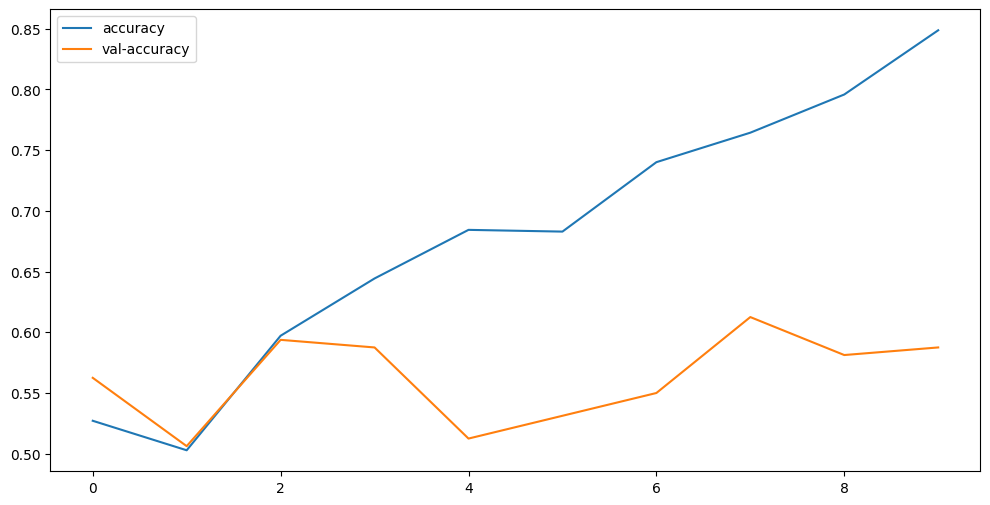

In [15]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val-accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 59ms/step


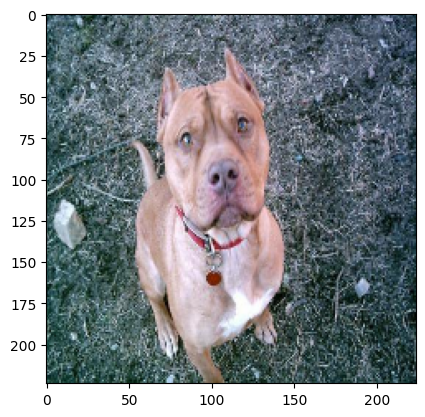

[[0.62074375]]
Predicted class: [[1]]


In [34]:
import numpy as np
for images, labels in test_ds.take(1):
    single_image=images[0].numpy()
    break
batch_img=np.expand_dims(single_image,axis=0)
y_pred=model.predict(batch_img)
plt.imshow(single_image.astype(np.uint8))
plt.show()
print(y_pred)
predicted_class = (y_pred>0.5).astype(int)
print("Predicted class:", predicted_class)
